<h3>CART Regression with Scikit Learn Overview</h3>
<br>
<h4>Classification and Regression Tree(CART): CART Regression</h4>
<br>
<br>
Decision Tree builds regression or classification models in the form of a tree structure.
<br> regression trees are needed when the response variable is numeric or continous.
<br> In either case, the predictors or independent variables may be categorical or numeric. It is the target variable that determines the types o decision tree needed.
<br>
<br>
<h3>DataSet: housing_boston.csv</h3>
<br>
<br>
<h4> For this project:</h4>
<br> -> We will investigate the Boston House Price dataset
<br> -> Each record in this database describes a Boston suburb or town.
<br> -> The data was drawn from the Boston Standard Metropolitan Statistical Area(SMSA) in 1970 The attributes are defined as follows:<br>
<br>
1. CRIM: per capita crime rate by town<br>
2. ZN: proportion of residential land zoned for lots over 25,000sq.ft.<br>
3. INDUS: proportion of non-retail business acres per town.<br>
4. CHAS: Charles River dummy variable( = 1 tract bounds river; 0 otherwise)<br>
5. NOX: nitric oxides concentration  (parts per 10 million)<br>
6. RM: average number of rooms per dwelling<br>
7. AGE: proportion of owner occupied units built prior to 1940<br>
8. DIS: weighted distances to five Boston employment center<br>
9. RAD: index of accessiility to radial highways<br>
10. TAX: full-value property-tax rate per 10,000 dollars<br>
11. PRATIO: pupil-teacher ratio by town<br>
12. B: 1000(Bk - 0:63)^2 Where Bk is the Proportion Blocks By Town.<br>
13. LSTAT: %lower status of the population<br>
14. MEDV: Median value of owner-occupied homes in 1000 dollars.
<br><br>
Note: For this assignment, we use a subset of the original dataset.
<br><br>
1. RM: average number of rooms per dwelling.<br>
2. AGE: proportion of owner -occupied units built prior to 1940.<br>
3. DIS: weighted distances to five Boston employment center.<br>
4. RAD: index of accessiility to radial highways <br>
5. PRATIO: pupil-teacher ratio by town.<br>
6. MEDV: Median value of owner-occupied homes in 1000 dollars.<br>

<h3>Load Data</h3><br>
<h5>import Python Libraries and Modules

In [24]:
#Import Python Libraries: Numpy and Pandas
import pandas as pd
import numpy as np
#Import Libraries and Modules for data visualization
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
#Import scikit-learn module to split the dataset into train/testsub-datasets
from sklearn.tree import DecisionTreeRegressor
#Import scikit-learn module to split the dataset into train/test sub-datasets.
from sklearn.model_selection import train_test_split
#import scikit-learn module for K-fold cross-validation - algorithm/model evaluation and validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

<h3>Load Dataset</h3><br><br>
<h5>Load Housing_Boston Dataset

In [25]:
#Specify location of the dataset
filename = '/Users/prithvinagkolla/Desktop/Data Sets/housing boston (2).csv'
#Specify the fields with their names
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
#Load the data into a Pandas DataFrame
df = pd.read_csv(filename,names = names)
#VIP Notes:
#Extract a sub-dataset from the original one -> dataframe: df2
df2 = df[['RM','AGE','DIS','RAD','PTRATIO','MEDV']]

<h3>Pre-process Dataset</h3>
<br>
<h5>Clean Data: Find and Mark Missing Values</h5>
<br>
NOTES:
<br>
The following columns cannot contain 0(zero) values i.e 0(zero) values are invalid in these columns.If they exist we need to mark them as missing value or numpy: NaN.
<br>
<h5> Preprocess the Dataset: Clean Data: Find and Mark Missing Values

In [26]:
#mark zero values as missing or NaN
df2[['RM','PTRATIO','MEDV']] = df2[['RM','PTRATIO','MEDV']].replace(0,np.NaN)
#count the number of NaN values in each column.
print(df2.isnull().sum())

RM         0
AGE        0
DIS        0
RAD        0
PTRATIO    0
MEDV       0
dtype: int64


<h3> Perform the Exploratory Data Analysis(EDA) on the Dataset </h3>
<br>
<h5> Perform the Exploratory Data Analysis (EDA) on the housing_boston dataset</h5>

In [27]:
#Get the dimensions or Shape of the dataset
#i.e. number of records/rows x number of variables/columns
print(df2.shape)

(452, 6)


In [28]:
#Get the data types of all variables/attributes of the dataset
#The results show
print(df2.dtypes)

RM         float64
AGE        float64
DIS        float64
RAD          int64
PTRATIO    float64
MEDV       float64
dtype: object


In [29]:
#Get several records/rows at the top of the dataset
#Get the first five records
print(df2.head(5))

      RM   AGE     DIS  RAD  PTRATIO  MEDV
0  6.575  65.2  4.0900    1     15.3  24.0
1  6.421  78.9  4.9671    2     17.8  21.6
2  7.185  61.1  4.9671    2     17.8  34.7
3  6.998  45.8  6.0622    3     18.7  33.4
4  7.147  54.2  6.0622    3     18.7  36.2


In [30]:
#Get the summary statistics of the numeric variables/attributes of the dataset
print(df2.describe())

               RM         AGE         DIS         RAD     PTRATIO        MEDV
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000
mean     6.343538   65.557965    4.043570    7.823009   18.247124   23.750442
std      0.666808   28.127025    2.090492    7.543494    2.200064    8.808602
min      3.561000    2.900000    1.129600    1.000000   12.600000    6.300000
25%      5.926750   40.950000    2.354750    4.000000   16.800000   18.500000
50%      6.229000   71.800000    3.550400    5.000000   18.600000   21.950000
75%      6.635000   91.625000    5.401100    7.000000   20.200000   26.600000
max      8.780000  100.000000   12.126500   24.000000   22.000000   50.000000


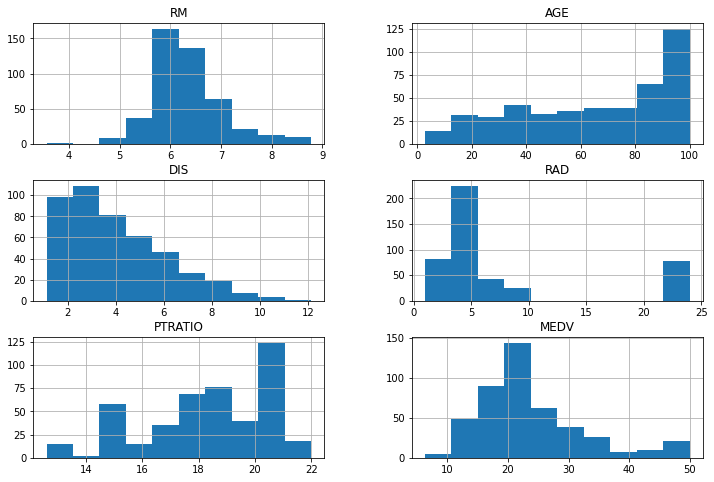

In [31]:
#plot histogram for each numeric
df2.hist(figsize = (12,8))
pyplot.show()

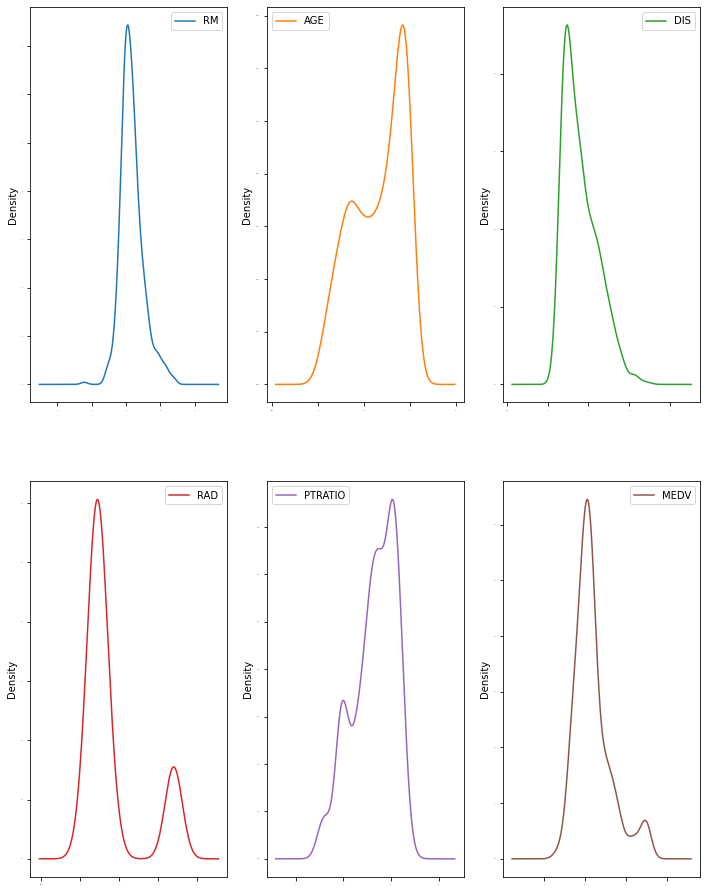

In [32]:
#create density plots
#Important Notes: 3 numeric variables - > at least 5 plots -> Layout (2,3): 2 rows, each row with 3 plots
df2.plot(kind = 'density',subplots = True,layout = (2,3),sharex = False, legend = True, fontsize = 1, figsize = (12,16))
pyplot.show()

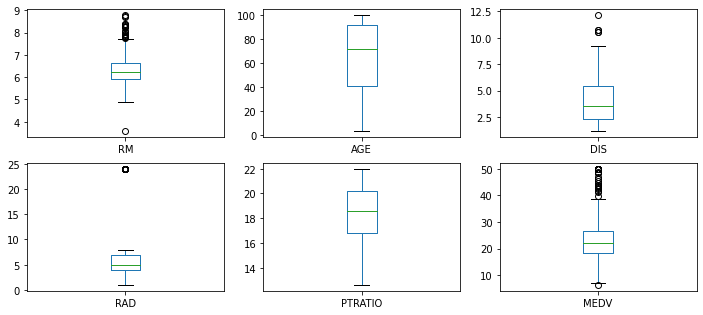

In [33]:
#Create Boxplots
df2.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, figsize = (12,8))
pyplot.show()

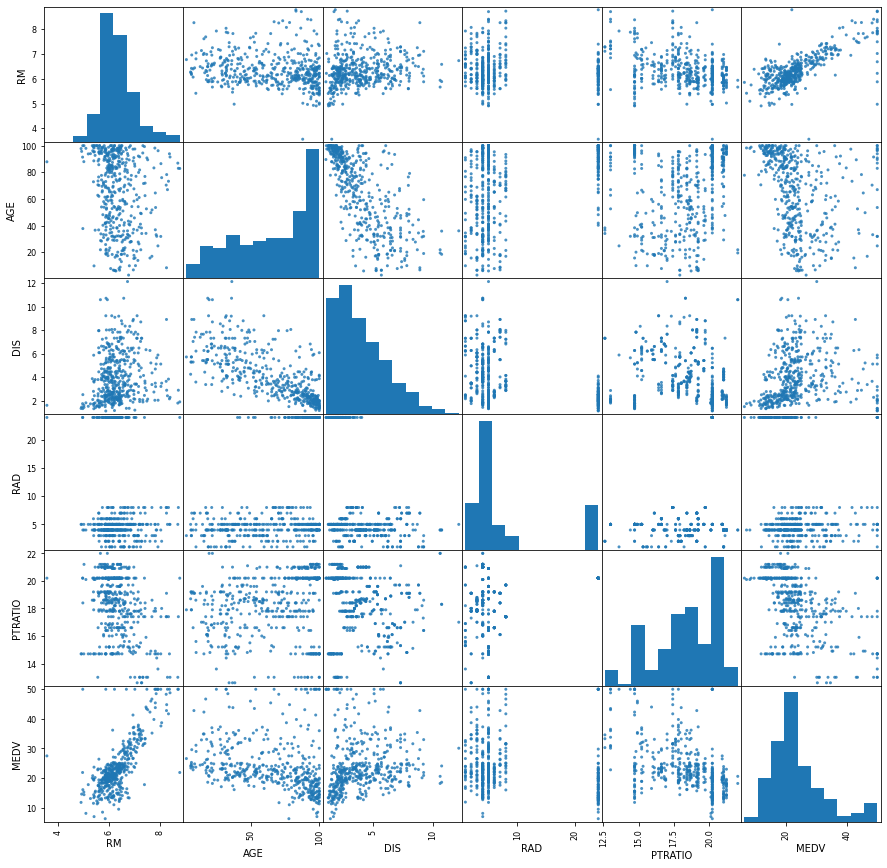

In [34]:
#Create scatter plot matrix
scatter_matrix(df2, alpha = 0.8, figsize = (15,15))
pyplot.show()

<h3>Separate Dataset into Input and Output Numpy Arrays</h3>
<br>
<br>
<h5> Separate Dataset into Input and Output Arrays</h5>

In [35]:
#Store dataframe values into a numpy array
array = df2.values
#separate array into input and output components by slicing
#For X (input)[:,5] -> all the rows, columns from 0 - 4 (5-1)
X = array[:,0:5]
#For Y (output)[:,5] - > all the rows, column index 5 (Last column)
Y = array[:,5]

Notes:
<br>
Store dataset in a multidimensional array. Y is the dependent variable and X is the independent variable
<br>
<h3>Split Input/Output Arrays into Training/Testing Datasets</h3>
<br>
<br>
<h5> Split Input/Output Arrays into Training /Testing Datasets</h5>

In [36]:
#Split the dataset -> training sub dataset: 67%, test sub-dataset: 33%
test_size = 0.33
#Selection of records to include isn which sub-dataset must be done randomly
#use this seed for randomization
seed = 7
#Split the dataset (both input and output into training/testing datasets)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = test_size, random_state = seed)

1/3 of set will be used for test- the remainder will be for training.
<br>
<h3>Build and Train the Model</h3>

In [37]:
#Buid the model
model = DecisionTreeRegressor(random_state = seed)
#Train the model using the training sub-dataset
model.fit(X_train, Y_train)

#Non-Linear -> NO Coefficients and the Intercept.
DecisionTreeRegressor(criterion = 'mse', max_depth=None, max_features = None, max_leaf_nodes = None,min_impurity_decrease = 0.0,
min_impurity_split = None, min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,presort=False,
random_state=seed,splitter = 'best')

DecisionTreeRegressor(presort=False, random_state=7)

<h2> Calculate R - Squared </h2>

In [38]:
R_squared = model.score(X_test, Y_test)
print('R-squared:', R_squared)

R-squared: 0.4754551282518267


Notes:
<br>
The higher the r squared the better (0-100%)
<br>
Depending upon the model, the best models score above 83% - tellsus how good the independent variables predict dependent
<br>
<h2> Prediction </h2>
<br>
we have trained the model.
<br>
Lets use the trained model to predict the 'Median value of owner-occupied homes in 1000 dollars'(MEDV). The suburb area has the following predictors:<br>
1. RM: average numer of rooms per dwelling = 6.0<br>
2. AGE: proportion of owner-occupied units built prior to 1940 = 55<br>
3. DIS: weighted distances to five Boston employment centers = 5<br>
4. RAD: index of accessibility to radial highways = 2
5. PTRATIO: pupil-teacher ratio by town = 16
<br>
<br>
<h5> Model Prediction </h5>

In [39]:
model.predict([[6.0,55,5,2,16]])

array([20.4])

Notes: 
So, the model predicts that the median value of owner-occupied homes in 1000 dollars in the above suburb should be around 20,000.
<br>
<h3>Evaluate/Validate Algorithm/Model - using K-Fold Cross-Validation</h3>

In [40]:
# Evaluate the Algorithm
#Specify the K-size
num_folds =10
#fix the random seed
#must use the same seed value, so that the same subsets can be obtained.
#for each time the process is repeated.
seed = 7
#split the whole data set into folds.

kfold = KFold(n_splits = num_folds, random_state = seed)
#for Linear regression, we can use MSE (mean squared error) value
#to evaluate the model/algorithm
scoring = 'neg_mean_squared_error'
#train the model and run the K fold cross validation to evaluate the model
results = cross_val_score(model, X,Y, cv = kfold, scoring = scoring)
#print the evaluation results
#result: the average of all the results obtained from the K fold cross validation
print('Evaluation Results:','\n','Average of all the results obtained from k-fold cross-validation:', results.mean())

Evaluation Results: 
 Average of all the results obtained from k-fold cross-validation: -40.52837777777778


Notes:
<br>
After we train we evaluate using K-fold to determine if the model is acceptable. We pass the whole set because the system will divide for us.
<br>
-40.5 avg of all error ( mean of square errors) this value would traditionally be position value, but scikit reports as neg. if Square Root was reported it would be around 2.36.